<h1 style="text-align: center;">WSI - Dwuosobowe gry deterministyczne</h1>

In [1]:
from game import Game
from game_simulator import GameSimulator
from gameUI import UI
from plotting import plot

W sprawozdaniu będę używał następujących oznaczeń:
 - N - początkowa liczba żetonów
 - K - maksymalna liczba żetonów jaką można wziąć na rundę
 


## 1. Przykładowa gra dwóch graczy komputerowych:
 - N: losowane z przedziału 8 - 20
 - K: 3
 - maksymalna głębia algorytmu minimax: 100

In [2]:
MAX_TOKENS_TAKE_PER_ROUND = 3
DEPTH = 100

ui = UI(show_messages=True)
game = Game(MAX_TOKENS_TAKE_PER_ROUND, ai_vs_ai=True, ui=ui, ai_depth=DEPTH)
winner = game.start()

Maximum number of tokens to take: 3

Round 1:
	Current tokens number: 12
	Player 1 took 3 tokens

Round 2:
	Current tokens number: 9
	Player 2 took 1 token

Round 3:
	Current tokens number: 8
	Player 1 took 3 tokens

Round 4:
	Current tokens number: 5
	Player 2 took 1 token

Round 5:
	Current tokens number: 4
	Player 1 took 3 tokens

Round 6:
	Current tokens number: 1
	Player 2 took last token

	Player 2 took 1 token

Player 2 lost!

The winner is player 1!


## 2. Badanie wpływu wartości początkowej liczby żetonów na zwycięzce rozgrywki

W tym eskperymencie zasymuluje wielokrotnie rozgrywkę dwóch graczy komputerowych dla różnych wartości N z przedziału 8-20 oraz K = 3:


In [3]:
NUMBER_OF_GAMES = 100
DEPTH = 100
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

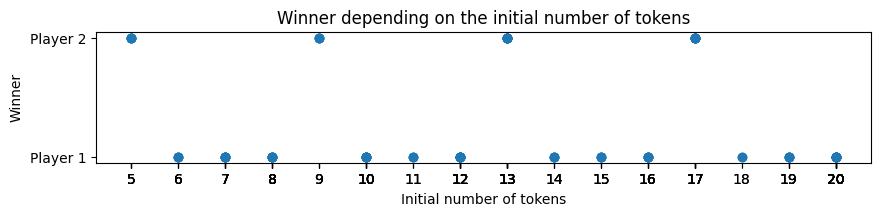

In [4]:
plot(results)

#### Wnioski:
 - mimo, że dla każdej wartości N było rozegranych kilka partii, to ich wynik zawsze jest ten sam

 - z wykresu widzimy, że jeżeli N wynosi kolejno 5, 9, 13, 17 to wygrywa gracz który wykonuje ruch jako drugi
 
 - wyniki wydają się być dobre, ponieważ dla N = 5, nieważne jaką liczbę żetonów weźmie gracz pierwszy, to i tak gracz drugi może potem wziąć taką ilość aby pozostał jeden żeton, podobnie dla K = 9, nieważne jaką ilość żetonów zabierze gracz pierwszy, to gracz drugi jest w stanie doprowadzić do sytuacji, w której zostanie 5 żetonów, a jak już wiemy dla K = 5 wygrywa zawsze gracz wykonujący ruch jako drugi

Tym razem użyję K = 4:

In [5]:
NUMBER_OF_GAMES = 100
DEPTH = 100
MAX_TOKENS_TAKE_PER_ROUND = 4

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

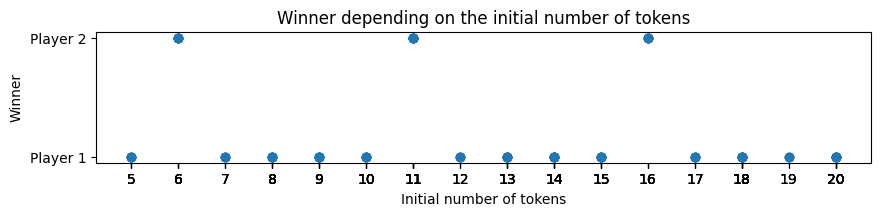

In [6]:
plot(results)

#### Wnioski:
 - sytuacja jest podobna jak w eksperymencie dla K = 3, tym razem gracz wykonujący ruch jako drugi wygrywa w każdej partii, w której N wynosi 6, 11, 16 itd, uzasadnienie tego jest identyczne jak dla K = 3
 
 - dla pozostałych N wygrywa zawsze gracz wykonujący ruch jako pierwszy

Teraz dla K = 5:

In [7]:
NUMBER_OF_GAMES = 100
DEPTH = 100
MAX_TOKENS_TAKE_PER_ROUND = 5

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

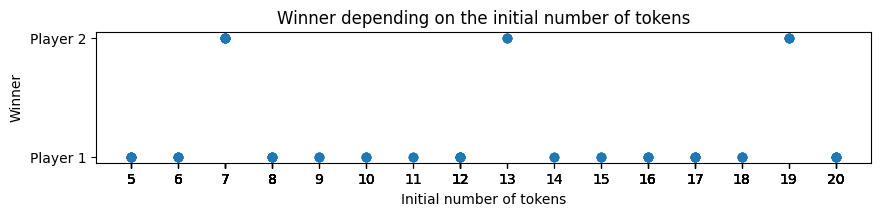

In [8]:
plot(results)

#### Wnioski:
 - analogicznie jak w poprzednich eksperymentach, gracz wykonujący ruch jako drugi wygrywa w każdej partii, w której N jest równe 7, 13, 19 itd.

 - w pozostałych przypadkach wygrywa zawsze gracz wykonujący ruch jako pierwszy

## Wnioski do eksperymentów:
 - na podstawie przeprowadzonych wyżej eksperymentów zauważamy, że w większości przypadków gre zwycięża gracz wykonujący ruch jako pierwszy

 - gracz wykonujący ruch jako drugi może liczyć na wygraną gdy zachodzi następująca zależność pomiędzy N i K:

<h3 style="text-align: center;">N = K + 2 + i(K + 1), ∀ i ∈ N ∪ {0}</h3>

- oczywiście należy założyć optymalną grę obydwu graczy

## 3. Badanie wartości maksymalnej głębokości na znajdowanie najlepszych ruchów

W tym eksperymencie zbadam wpływ maksymalnej głębokości algorytmu minimax na znajdowanie optymalnych ruchów. Czyli tak naprawdę będę badał jak dobra jest funkcja heurystyczna, która określa czy dany stan jest lepszy dla gracza max czy dla gracz min.


### Głębia = 10:

In [9]:
NUMBER_OF_GAMES = 100
DEPTH = 10
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

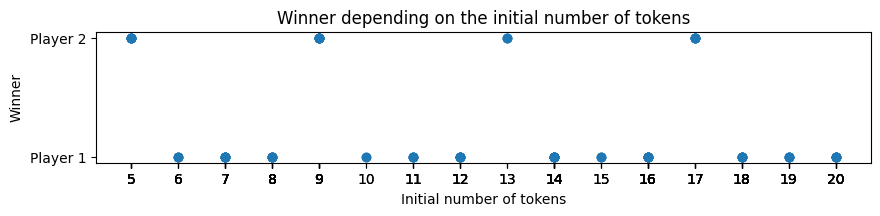

In [10]:
plot(results)

### Głębia = 5:

In [11]:
NUMBER_OF_GAMES = 100
DEPTH = 5
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

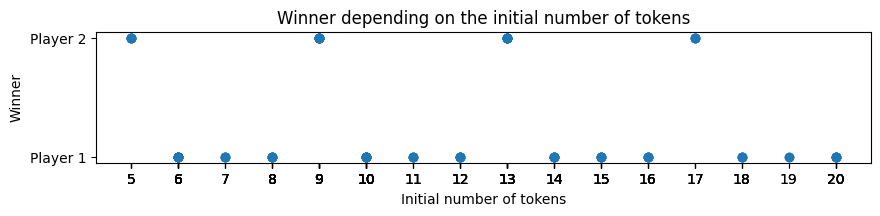

In [12]:
plot(results)

### Głębia = 3:

In [13]:
NUMBER_OF_GAMES = 100
DEPTH = 3
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

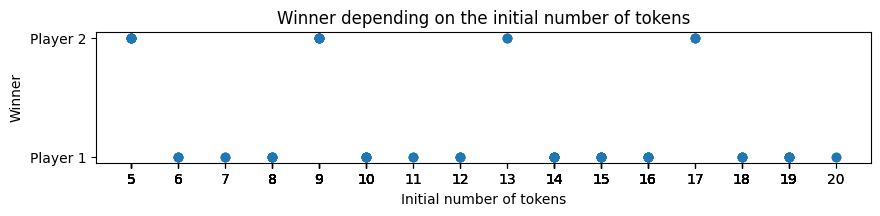

In [14]:
plot(results)

### Głębia = 2:

In [15]:
NUMBER_OF_GAMES = 100
DEPTH = 2
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

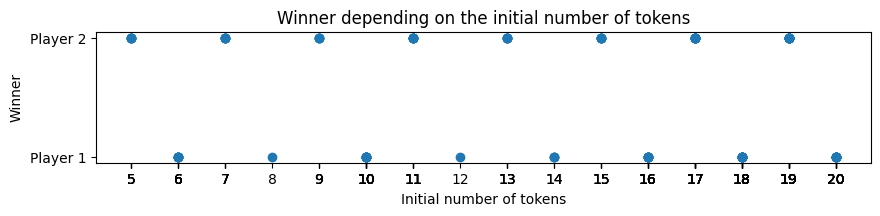

In [16]:
plot(results)

### Głębia = 1:

In [17]:
NUMBER_OF_GAMES = 100
DEPTH = 1
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

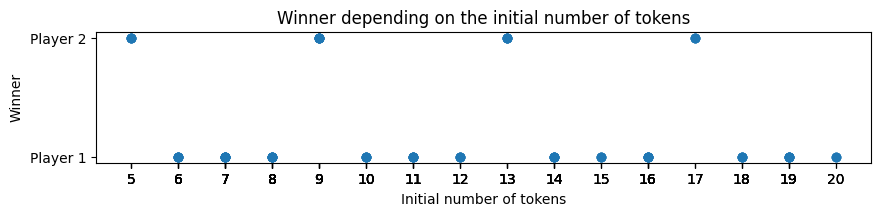

In [18]:
plot(results)

### Głębia = 0:

In [19]:
NUMBER_OF_GAMES = 100
DEPTH = 0
MAX_TOKENS_TAKE_PER_ROUND = 3

simulator = GameSimulator(NUMBER_OF_GAMES, MAX_TOKENS_TAKE_PER_ROUND, DEPTH)
results = simulator.simulate()
results.sort(key=lambda x: x.initial_tokens_number)

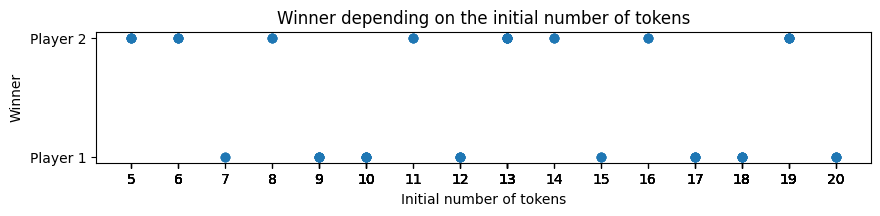

In [20]:
plot(results)

### Wnioski:
 - na podstawie eksperymentów zauważamy, że algorytm znajduje optymalne ruchy dla graczy dla głębi równej conajmniej 3

 - dla głębi równej 2 gracz wykonujący ruch jako pierwszy wygrywa dla wszystkich parzystych wartości N, a dla pozostałych przegrywa
 
 - przy głębi równej 0 algorytm rozważa tylko aktualny stan, zatem tak naprawdę znalezienie optymalnego ruchu zależy tylko od funkcji heurystycznej

 - co ciekawe algorytm znajduje optymalne ruchy dla głębi równej 1